In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [3]:
# To remove the scientific notation from numpy arrays
#np.set_printoptions(suppress=True)

# Load the data
water = pd.read_csv("https://raw.githubusercontent.com/bennysun1/data352/data/waterQuality1.csv", na_values = "#NUM!")
water = water.dropna()

# Separate Target Variable and Predictor Variables
target_variable = 'is_safe'
predictors = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
              'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
              'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
              'silver', 'uranium']

X = water[predictors].values
y = water[target_variable].values

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimization 1

In [4]:
# make a function to adjust learning rate based off the
# epoch number
def lr_schedule(epoch):
    if epoch < 15:
        return 0.01
    elif epoch < 35:
        return 0.001
    else:
        return 0.0001

Optimization 1: 5 fold cross validation

In [5]:
from sklearn.model_selection import cross_validate
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [63]:
# Define the number of folds for cross-validation
k = 5

# Define the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

folds = StratifiedKFold(n_splits=k)

train_accuracy_scores = []
val_accuracy_scores = [] 
train_loss_scores = []
val_loss_scores = []
train_accuracy_history = []
val_accuracy_history = []
train_loss_history = []
val_loss_history = [] 

# Loop over each fold
for train_index, val_index in kf.split(X):

    tf.random.set_seed(42)

    # Split the data into training and validation sets for this fold
    # 80-20 train-val
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]

    # Define the model architecture
    model1_cv = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(8, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(lr=0.01)

    # Compile the model with adam optimizer
    model1_cv.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Train the model
    history1 = model1_cv.fit(X_train, y_train, epochs=100, batch_size=32,
                             validation_data=(X_val, y_val),
                             callbacks=[early_stopping, lr_scheduler])

    train_accuracy_history.append(history1.history['accuracy'])
    val_accuracy_history.append(history1.history['val_accuracy']) 
    train_loss_history.append(history1.history['loss'])
    val_loss_history.append(history1.history['val_loss'])

    # Evaluate the model on the validation set for this fold
    score = model1_cv.evaluate(X_val, y_val, verbose=0)
    val_loss_scores.append(score[0])
    val_accuracy_scores.append(score[1])

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.2846 - accuracy: 0.8912 - val_loss: 0.2132 - val_accuracy: 0.9156 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1964 - accuracy: 0.9248 - val_loss: 0.1607 - val_accuracy: 0.9312 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.1778 - accuracy: 0.9307 - val_loss: 0.1530 - val_accuracy: 0.9400 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.1666 - accuracy: 0.9370 - val_loss: 0.1296 - val_accuracy: 0.9450 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1551 - accuracy: 0.9422 - val_loss: 0.1341 - val_accuracy: 0.9506 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1435 - accuracy: 0.9448 - val_loss: 0.1218 - val_accuracy: 0.9525 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 3ms/st

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.2981 - accuracy: 0.8779 - val_loss: 0.2220 - val_accuracy: 0.9143 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1980 - accuracy: 0.9273 - val_loss: 0.1820 - val_accuracy: 0.9375 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1688 - accuracy: 0.9365 - val_loss: 0.1774 - val_accuracy: 0.9450 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.1587 - accuracy: 0.9404 - val_loss: 0.1490 - val_accuracy: 0.9437 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.1479 - accuracy: 0.9443 - val_loss: 0.1631 - val_accuracy: 0.9462 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1390 - accuracy: 0.9465 - val_loss: 0.1480 - val_accuracy: 0.9425 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 4ms/st

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.2975 - accuracy: 0.8776 - val_loss: 0.1617 - val_accuracy: 0.9406 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1991 - accuracy: 0.9237 - val_loss: 0.1587 - val_accuracy: 0.9387 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1810 - accuracy: 0.9304 - val_loss: 0.1298 - val_accuracy: 0.9506 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1596 - accuracy: 0.9400 - val_loss: 0.1197 - val_accuracy: 0.9575 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1548 - accuracy: 0.9420 - val_loss: 0.1097 - val_accuracy: 0.9575 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.1530 - accuracy: 0.9442 - val_loss: 0.1254 - val_accuracy: 0.9487 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 6ms/st

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.2924 - accuracy: 0.8842 - val_loss: 0.2717 - val_accuracy: 0.9031 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2023 - accuracy: 0.9226 - val_loss: 0.1705 - val_accuracy: 0.9331 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1884 - accuracy: 0.9331 - val_loss: 0.1593 - val_accuracy: 0.9387 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1684 - accuracy: 0.9348 - val_loss: 0.1376 - val_accuracy: 0.9500 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1505 - accuracy: 0.9434 - val_loss: 0.1231 - val_accuracy: 0.9550 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1530 - accuracy: 0.9454 - val_loss: 0.1215 - val_accuracy: 0.9543 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 4ms/st

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.3027 - accuracy: 0.8738 - val_loss: 0.1753 - val_accuracy: 0.9375 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2019 - accuracy: 0.9215 - val_loss: 0.1602 - val_accuracy: 0.9437 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1725 - accuracy: 0.9317 - val_loss: 0.1424 - val_accuracy: 0.9450 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1691 - accuracy: 0.9351 - val_loss: 0.1176 - val_accuracy: 0.9562 - lr: 0.0100
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1513 - accuracy: 0.9411 - val_loss: 0.1225 - val_accuracy: 0.9575 - lr: 0.0100
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1515 - accuracy: 0.9439 - val_loss: 0.1151 - val_accuracy: 0.9543 - lr: 0.0100
Epoch 7/100
200/200 [==============================] - 1s 5ms/st

In [61]:
# Calculate the mean and standard deviation of the scores across all folds
mean_val_acc = np.mean(val_accuracy_scores)
std_val_acc = np.std(val_accuracy_scores)
mean_val_loss = np.mean(val_loss_scores)
std_val_loss = np.std(val_loss_scores)


print("Mean Validation Accuracy over", k, "folds:", mean_val_acc)
print("Std of Validation Accuracies over", k, "folds:", std_val_acc)
print("Mean Validation Loss over", k, "folds:", mean_val_loss)
print("Std of Validation Losses over", k, "folds:", std_val_loss)


Mean Validation Accuracy over 5 folds: 0.9621058583259583
Std of Validation Accuracies over 5 folds: 0.005182749281446599
Mean Validation Loss over 5 folds: 0.09712696522474289
Std of Validation Losses over 5 folds: 0.010020220733342687


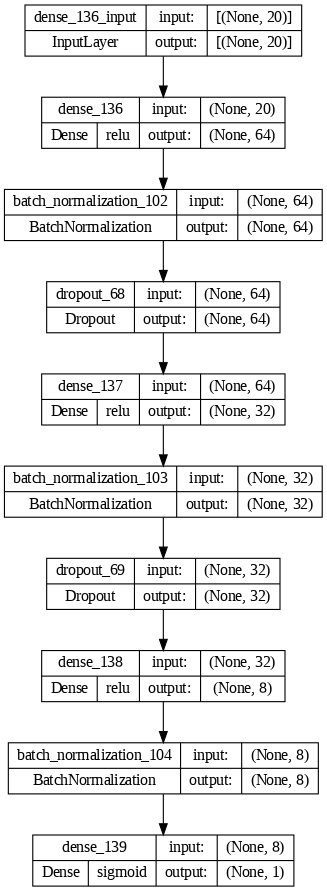

In [58]:
tf.keras.utils.plot_model(
model1_cv,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi = 80,
layer_range=None,
show_layer_activations=True,
)

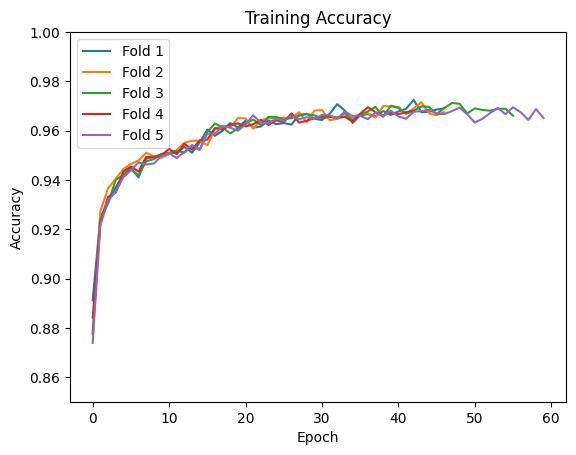

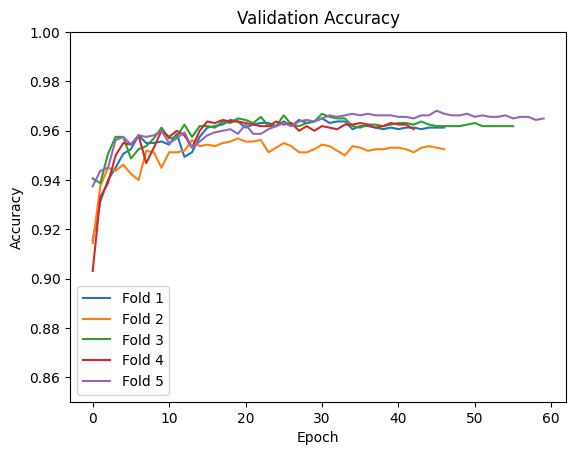

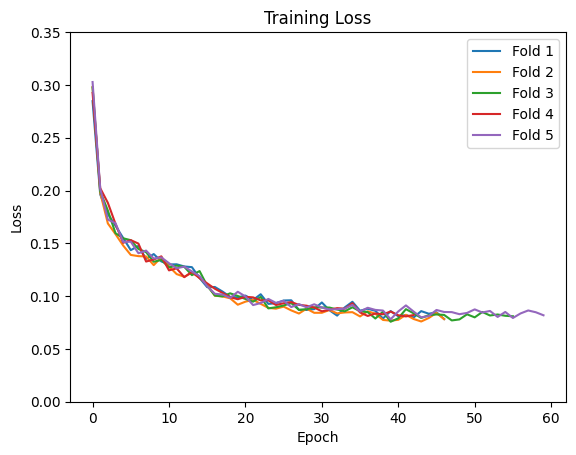

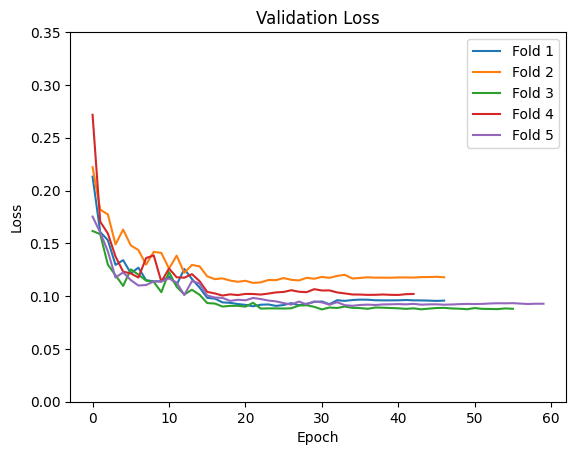

In [65]:

for i, train_accuracy in enumerate(train_accuracy_history):
    plt.plot(train_accuracy, label=f'Fold {i+1}')

plt.ylim([0.85, 1.0])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for i, val_accuracy in enumerate(val_accuracy_history):
    plt.plot(val_accuracy, label=f'Fold {i+1}')

plt.ylim([0.85, 1.0])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


for i, val_loss in enumerate(train_loss_history):
    plt.plot(val_loss, label=f'Fold {i+1}')

plt.ylim([0, 0.35])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


for i, val_loss in enumerate(val_loss_history):
    plt.plot(val_loss, label=f'Fold {i+1}')

plt.ylim([0, 0.35])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

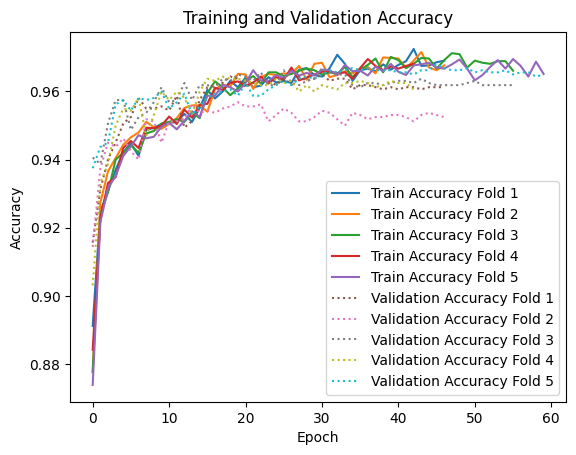

In [66]:
fig, ax = plt.subplots()

for i, accuracy in enumerate(train_accuracy_history):
    ax.plot(accuracy, label=f'Train Accuracy Fold {i+1}')

for i, accuracy in enumerate(val_accuracy_history):
    ax.plot(accuracy, label=f'Validation Accuracy Fold {i+1}', linestyle=':')
      
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

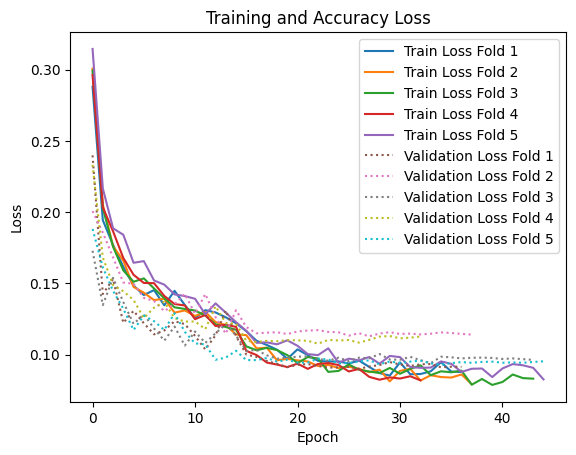

In [48]:
fig, ax = plt.subplots()

for i, loss in enumerate(train_loss_history):
    ax.plot(loss, label=f'Train Loss Fold {i+1}')

for i, accuracy in enumerate(val_loss_history):
    ax.plot(accuracy, label=f'Validation Loss Fold {i+1}', linestyle=':')
    
plt.title('Training and Accuracy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()